In [11]:
import numpy
from matplotlib import pyplot as py
from scipy import linalg

In [18]:
L = 0.01
nx, ny = 21, 21
dx = L / (nx - 1)
dy = L / (ny - 1)

x = numpy.linspace(0.0, L, num=nx)
y = numpy.linspace(0.0, L, num=ny)

alpha = 1e-4
delta = min(dx, dy)

T0 = numpy.full((ny, nx), 20.0)
T0[0, :] = 100.0 # bottom boundary
T0[:, 0] = 100.0 # left boundary

In [25]:
def btcs(T0, nt, dt, delta, alpha):
    sigma = alpha * dt / delta**2
    M, N = nx - 2, ny - 2
    I, J = int(M / 2), int(N / 2)    
    A = lhs_operator(M, N, sigma)
    T = T0[1:-1, 1:-1].flatten()
    for n in range(nt):
        b = rhs_vector(T, M, N, sigma)
        T = numpy.linalg.solve(A, b)
        if T[J * M + I] >= 70.0:
            break
    print('[time step {}] Center at T={:.2f} at t={:.2f} s'
          .format(n + 1, T[J * M + I], (n + 1) * dt))
    return map_1d_to_2d(T, nx, ny)

In [26]:
def lhs_operator(M, N, sigma):
    A = numpy.zeros((M * N, M * N))
    for j in range(N):
        for i in range(M):
            I = j * M + i
            west = I - 1
            east = I + 1
            south = I - M
            north = I + M
            if i == 0 and j == 0: # bottom left corner (interior)
                A[I, I] = 1 / sigma + 4
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif i == M - 1 and j == 0: # bottom right corner (interior)
                A[I, I] = 1/ sigma + 3
                A[I, west] = -1.0
                A[I, north] = -1.0
            elif i == 0 and j == N - 1: # top-left corner (interior)
                A[I, I] = 1/ sigma + 3
                A[I, east] = -1.0
                A[I, south] = -1.0
            elif i == N - 1 and j == N - 1: # top-right corner (interior)
                A[I, I] = 1/ sigma + 2
                A[I, west] = -1.0
                A[I, south] = -1.0
            elif j == 0: # first row of interior points
                A[I, I] = 1/ sigma + 4
                A[I, west] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
            elif j == N - 1: # last row of interior points
                A[I, I] = 1/ sigma + 3
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, east] = -1.0
            elif i == 0: # first column of interior points
                pass
            elif i == M - 1: # last column of interior points
                pass
            else:
                A[I, I] = 1 / sigma + 4
                A[I, south] = -1.0
                A[I, west] = -1.0
                A[I, east] = -1.0
                A[I, north] = -1.0
        return A

In [30]:
def rhs_vector(T, M, N, sigma):
    b = 1.0 / sigma * T
    for j in range(N):
        for i in range(M):
            I = j * M + i
            if i == 0:
                b[I] += 100.0
            if j == 0:
                b[I] += 100.0
    return b

In [31]:
def map_1d_to_2d(T_1d, nx, ny, Tb):
    T = numpy.zeros((ny, nx))
    T[1:-1, 1:-1] = T_1d.reshape((ny - 2, nx - 2))
    # Dirichlet condition (left and bottom boundaries).
    T[:, 0] = 100.0
    T[0, :] = 100.0
    # Neumann condition (right and top boundaries).
    T[:, -1] = T[:, -2]
    T[-1, :] = T[-2, :]
    return T

In [32]:
sigma = 0.25
dt = sigma * min(dx, dy)**2 / alpha 
nt = 300

# Compute the temperature along the rod.
T = btcs(T0, nt, dt, delta, alpha)

LinAlgError: Singular matrix

NameError: name 'T' is not defined

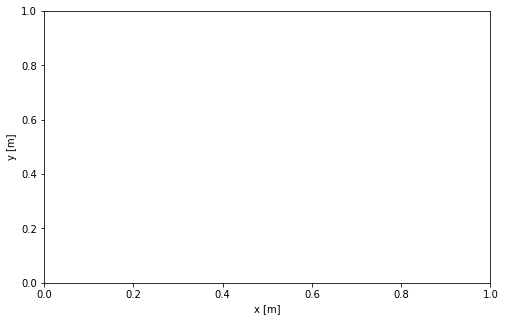

In [35]:
py.figure(figsize=(8.0, 5.0))
py.xlabel('x [m]')
py.ylabel('y [m]')
levels = numpy.linspace(20.0, 100.0, num=51)
contf = py.contourf(x, y, T, levels=levels)
cbar = py.colorbar(contf)
cbar.set_label('Temperature [C]')
py.axis('scaled', adjustable='box');